In [1]:
import pandas as pd
df = pd.read_csv('c:/data/spam/spam.csv',encoding='latin1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# ham => 0, spam => 1 로 바꾸어 저장
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

0    4825
1     747
Name: v1, dtype: int64


<AxesSubplot:>

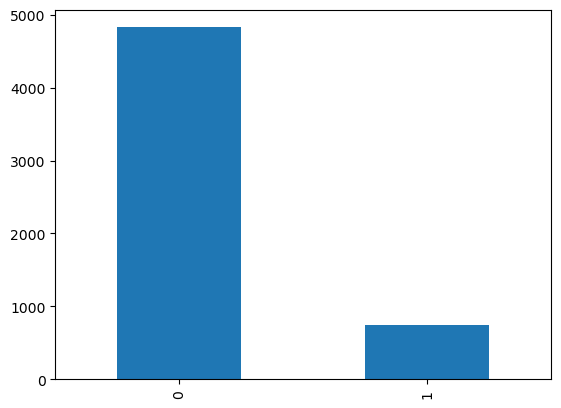

In [4]:
print(df['v1'].value_counts())
df['v1'].value_counts().plot(kind='bar')

In [5]:
X=df[['v2']] #독립변수
y=df['v1'] #종속변수
print(X[:3])
print(y[:3])

                                                  v2
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
0    0
1    0
2    1
Name: v1, dtype: int64


0    747
1    747
Name: v1, dtype: int64


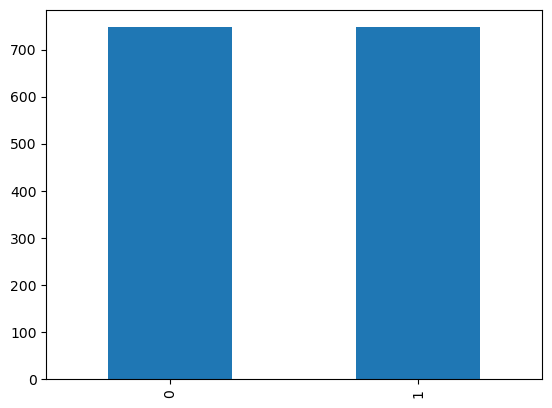

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['v2'] )
y_samp = pd.DataFrame(data=y_sample,columns=['v1'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
print(df_samp['v1'].value_counts())
df_samp['v1'].value_counts().plot(kind='bar')
X = df_samp['v2']
y = df_samp['v1']

In [7]:
from keras.preprocessing.text import Tokenizer
#단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
#텍스트를 시퀀스로 변환(단어의 인덱스로만 구성된 새로운 리스트)
sequences = tokenizer.texts_to_sequences(X)
print(sequences[:5])

[[1486, 49, 801, 1487, 18, 336, 87, 26, 2274, 45, 27, 173], [1148, 14, 4, 25, 613], [174, 149, 4, 2, 189, 5, 105, 17, 614, 613], [946, 88, 38, 399, 702, 1, 2275, 1488, 130, 2276, 26, 1489, 242, 45, 702, 1, 2277, 2278, 24, 46, 1149], [7, 291, 1490, 802, 553, 53, 316, 26, 803, 703, 25, 63, 47, 217, 1491, 13, 434, 337, 97]]


In [8]:
#단어와 인덱스 목록
word_to_index = tokenizer.word_index
# print(word_to_index)
for idx,word in enumerate(word_to_index):
    print(idx+1,word, end=',')
    if idx>8:
        break 

1 to,2 you,3 a,4 call,5 i,6 the,7 u,8 your,9 for,10 is,

12
메일의 최대 길이 : 77
메일의 평균 길이 : 19.846050870147256


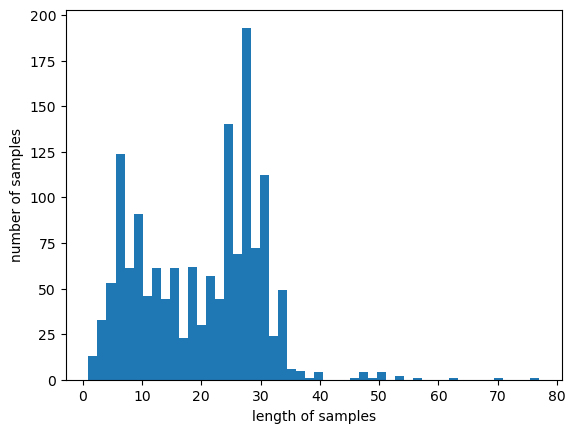

In [9]:
import matplotlib.pyplot as plt
X_data = sequences
print(len(X_data[0]))
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
# print('메일의 평균 길이 : %f' % sum(map(len, X_data))/len(X_data))
print('메일의 평균 길이 :', sum(map(len, X_data))/len(X_data))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples') # 길이
plt.ylabel('number of samples') # 샘플수
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#최대 사이즈에 맞추어 빈칸에 0으로 채움
data = pad_sequences(X_data, maxlen = 77)
print("학습용 데이터의 크기(shape): ", data.shape)
print(data[:1])

학습용 데이터의 크기(shape):  (1494, 77)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1486   49  801 1487   18
   336   87   26 2274   45   27  173]]


In [11]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=10)

In [12]:
from keras.layers import Embedding, Dense, LSTM, SimpleRNN
from keras.models import Sequential
model = Sequential()
# Embedding(입력사이즈,출력사이즈)
model.add(Embedding(len(word_to_index)+1, 32))
# model.add(SimpleRNN(32)) # output size 32
model.add(LSTM(32)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 3s 39ms/step - loss: 0.6300 - accuracy: 0.7856 - val_loss: 0.5311 - val_accuracy: 0.8828
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.4343 - accuracy: 0.9069 - val_loss: 0.3455 - val_accuracy: 0.9121
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 0.2854 - accuracy: 0.9372 - val_loss: 0.2382 - val_accuracy: 0.9372
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 0.1936 - accuracy: 0.9519 - val_loss: 0.1727 - val_accuracy: 0.9498
Epoch 5/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1302 - accuracy: 0.9707 - val_loss: 0.1495 - val_accuracy: 0.9582
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1199 - accuracy: 0.9697 - val_loss: 0.1209 - val_accuracy: 0.9749
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0728 - accuracy: 0.9864 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 8/10
15

In [14]:
model.evaluate(X_test, y_test.values, verbose=0)

[0.12390122562646866, 0.9698996543884277]

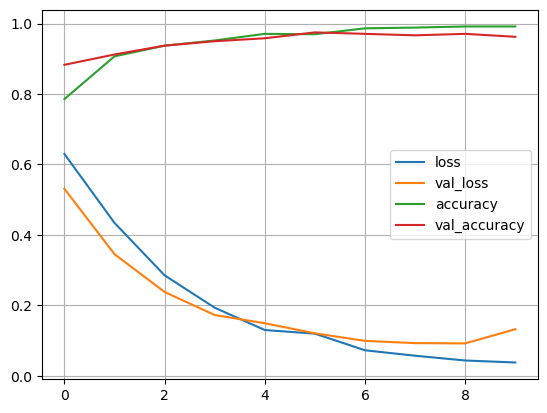

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [16]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 334ms/step


array([[0.98253214],
       [0.11104063],
       [0.99317896]], dtype=float32)